<a href="https://colab.research.google.com/github/Hong071099/Project-RFM-Analysis-Online-Retail-Dataset/blob/main/H%E1%BB%93ng's_RFM_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I/ Import Library & Dataset

## 1/ Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import missingno

In [2]:
# OPTIONA:
import warnings
warnings.filterwarnings('ignore')

## 2/ Load Data

In [4]:
# import data
import gdown

# Download Data
file_id = "1od0TjqVcbtPxonZzt90yhSgMqERMwZfk"
output_file = "Online_Retail.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)
df = pd.read_csv("Online_Retail.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1od0TjqVcbtPxonZzt90yhSgMqERMwZfk
To: /content/Online_Retail.csv
100%|██████████| 44.5M/44.5M [00:00<00:00, 112MB/s]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# II/ Data Explore

## 1/ Data Understanding

In [10]:
df.head ()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.shape

(541909, 8)

In [12]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
# Change datatype
df ['CustomerID'] = df ['CustomerID'].astype (str)
df ['InvoiceDate'] = pd.to_datetime (df['InvoiceDate'])

In [14]:
# Check the return orders base on Quantity
# If Quantity < 0 => it could be return orders
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [15]:
# InvoiceNo have 2 different sign, contain C and without C
df[df["InvoiceNo"].str.contains("C", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
df['InvoiceNo'].str.startswith("C").value_counts()


,count
InvoiceNo,
False,532621
True,9288


In [17]:
# The Quantity < 0 & InvoiceNo with first C => Return orders

df[df['InvoiceNo'].str.startswith("C") & (df['Quantity'] < 0)].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [18]:
# Don't use the info with return ordes
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

In [19]:
# Create the order_value
df['TotalAmount'] = df.Quantity * df.UnitPrice

In [20]:
df['TotalAmount'].head()

,TotalAmount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


## 2/ Data Preparation

In [22]:
df.shape
# After remove the return orders and add the TotalAmount column

(532621, 9)

### Missing Values

In [23]:
# Check missing value
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalAmount,0



Preview of data with null values:


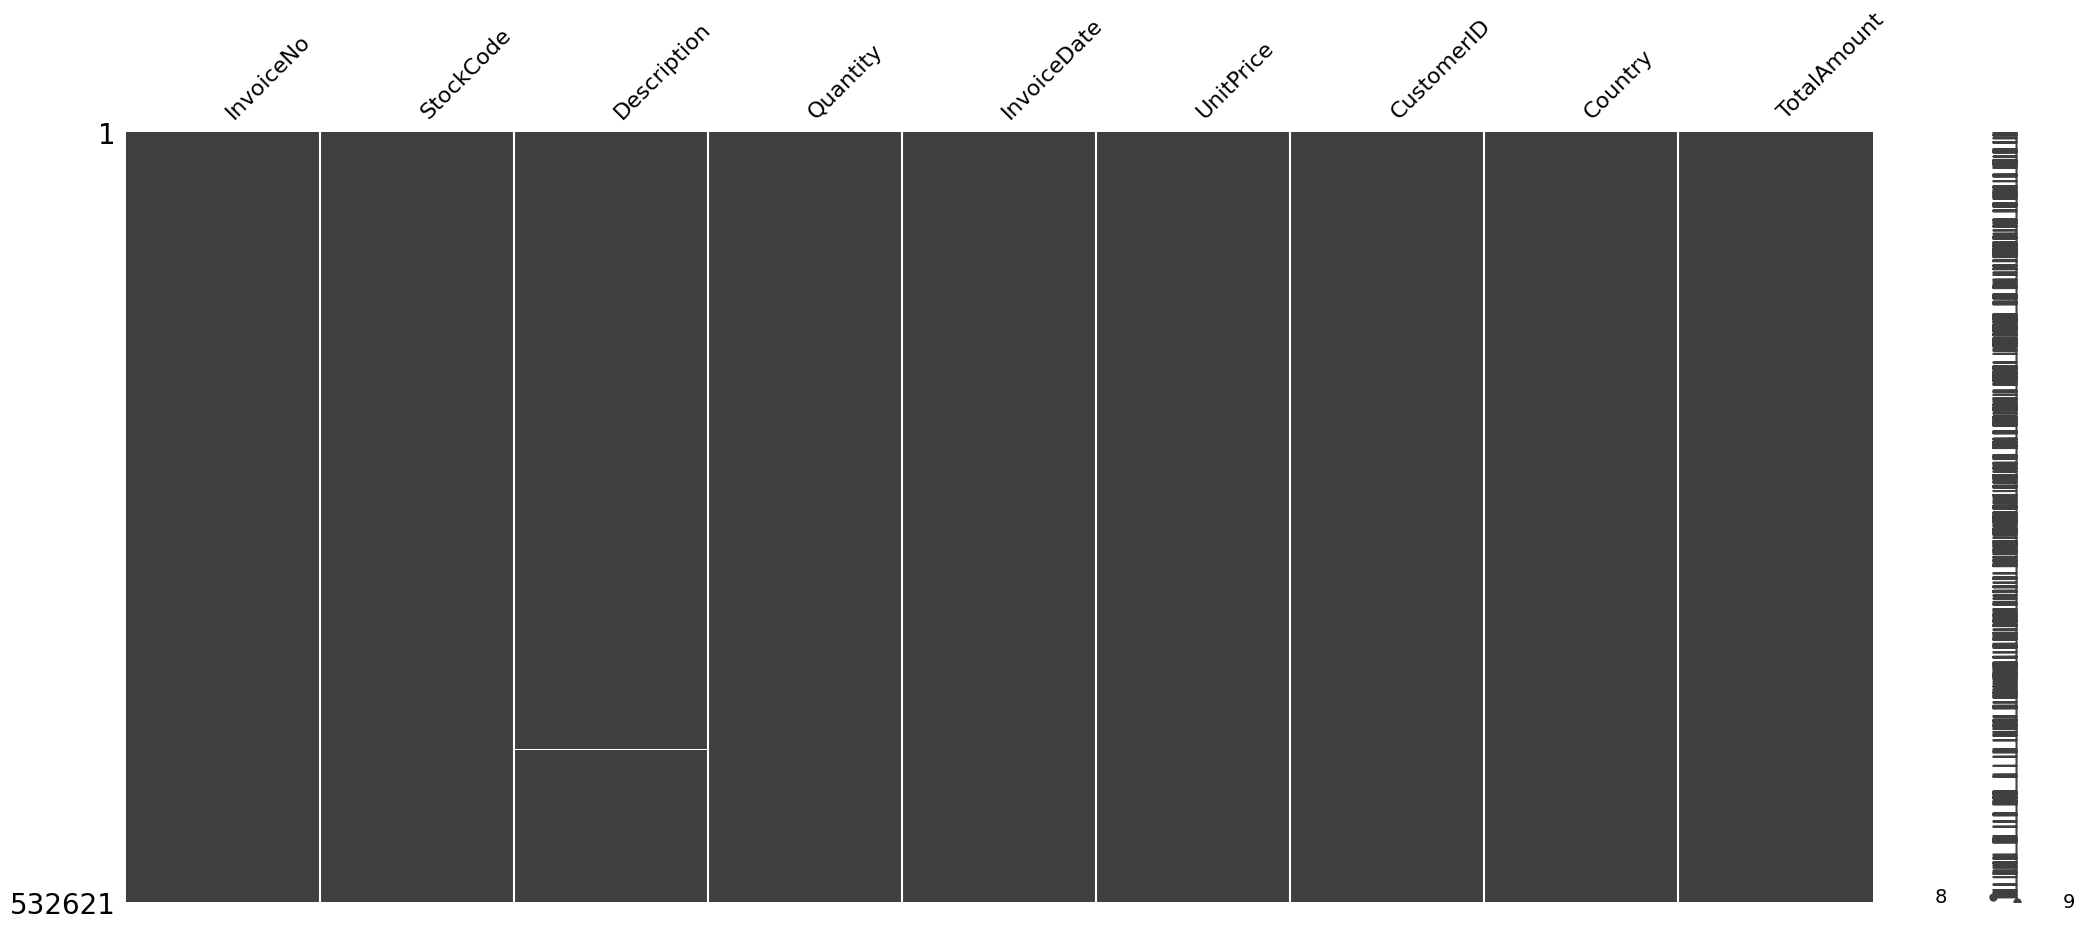

In [24]:
# generate preview of entries with null values
print("\nPreview of data with null values:")
print('='*10)

missingno.matrix(df)
plt.show()

In [25]:
# Remove missing values
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531167 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531167 non-null  object        
 1   StockCode    531167 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     531167 non-null  int64         
 4   InvoiceDate  531167 non-null  datetime64[ns]
 5   UnitPrice    531167 non-null  float64       
 6   CustomerID   531167 non-null  object        
 7   Country      531167 non-null  object        
 8   TotalAmount  531167 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.5+ MB


### Outliers

In [26]:
df1.describe([0.01,0.05,0.25,0.50, 0.75, 0.90,0.95,0.99]).T

,count,mean,min,1%,5%,25%,50%,75%,90%,95%,99%,max,std
Quantity,531167.0,10.293623,-9600.0,1.0,1.0,1.0,3.0,10.0,24.0,30.0,100.0,80995.0,159.301358
InvoiceDate,531167,2011-07-04 19:55:25.199757824,2010-12-01 08:26:00,2010-12-03 11:13:00,2010-12-13 09:35:00,2011-03-28 12:13:00,2011-07-20 12:45:00,2011-10-19 12:54:00,2011-11-21 16:48:00,2011-11-30 14:46:00,2011-12-08 09:28:00,2011-12-09 12:50:00,NaN
UnitPrice,531167.0,3.858153,-11062.06,0.2632,0.42,1.25,2.08,4.13,7.95,9.95,16.98,13541.33,41.814651
TotalAmount,531167.0,20.039951,-11062.06,0.43,1.25,3.75,9.9,17.7,32.6,59.68,183.6,168469.6,270.942296


In [ ]:
# Explore the distribution by hist or describe
# Filter outlier on quantity and Total Amount

In [28]:
q_cap_95 = df['Quantity'].quantile(0.95)
total_amount_cap_95 = df['TotalAmount'].quantile(0.95)

In [29]:
q_flr = 0
q_cap = q_cap_95
order_val_cap = total_amount_cap_95

df1 = df[df.Quantity >= q_flr]
df1 = df1[df.TotalAmount >= q_flr]
df1.describe([0.01,0.05,0.25,0.50, 0.75, 0.90,0.95,0.99]).T

,count,mean,min,1%,5%,25%,50%,75%,90%,95%,99%,max,std
Quantity,531283.0,10.655299,1.0,1.0,1.0,1.0,3.0,10.0,24.0,30.0,100.0,80995.0,156.830617
InvoiceDate,531283,2011-07-04 18:15:33.177910016,2010-12-01 08:26:00,2010-12-03 11:13:00,2010-12-13 09:35:00,2011-03-28 11:59:00,2011-07-20 12:01:00,2011-10-19 12:35:00,2011-11-21 16:36:00,2011-11-30 14:46:00,2011-12-08 09:28:00,2011-12-09 12:50:00,NaN
UnitPrice,531283.0,3.898954,0.0,0.21,0.42,1.25,2.08,4.13,7.95,9.95,16.98,13541.33,35.876279
TotalAmount,531283.0,20.077218,0.0,0.42,1.25,3.75,9.9,17.7,32.6,59.679,183.6,168469.6,270.058254


In [30]:
df1 = df1[(df1.Quantity < q_cap) & (df1.TotalAmount < order_val_cap)]
df1.describe([0.01,0.05,0.25,0.50, 0.75, 0.90,0.95,0.99]).T

,count,mean,min,1%,5%,25%,50%,75%,90%,95%,99%,max,std
Quantity,493380.0,5.68609,1.0,1.0,1.0,1.0,3.0,8.0,12.0,24.0,25.0,29.0,6.141043
InvoiceDate,493380,2011-07-04 20:34:58.358141952,2010-12-01 08:26:00,2010-12-03 11:13:00,2010-12-13 09:35:00,2011-03-27 16:08:00,2011-07-20 12:05:00,2011-10-19 16:59:00,2011-11-22 10:35:24,2011-11-30 15:13:00,2011-12-08 09:28:00,2011-12-09 12:50:00,NaN
UnitPrice,493380.0,3.263524,0.0,0.29,0.42,1.25,2.1,4.13,7.65,9.95,16.67,58.5,3.541951
TotalAmount,493380.0,11.230037,0.0,0.42,1.25,3.36,8.4,16.5,23.6,30.6,47.6,59.4,9.959283


## 3/ Create RFM Score

### Recency

`TODO_02`: Calculate Recency

In [31]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
# First, detect the most recent day in the datasets
print("Min Date", df1["InvoiceDate"].min(), "\nMax Date", df1["InvoiceDate"].max())

Min Date 2010-12-01 08:26:00 
Max Date 2011-12-09 12:50:00


In [32]:
r_series = (df1["InvoiceDate"].max() - df1.groupby("CustomerID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
r_series['Recency'] = r_series['Recency'].apply(lambda x: x.days) # Use apply to map the function (lambda) to all elements of the series
r_series.head()

,Recency
CustomerID,
12347.0,1
12348.0,74
12349.0,18
12350.0,309
12352.0,35


array([[<Axes: title={'center': 'Recency'}>]], dtype=object)

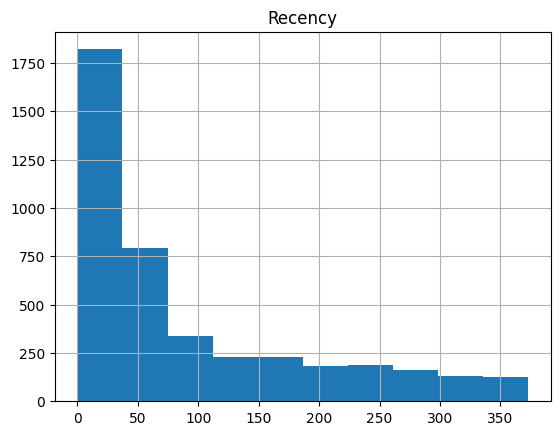

In [34]:
r_series.hist()

### Frequency

`TODO_03`: Calculate Frequency

In [35]:
f_series = df1.groupby("CustomerID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
f_series.head()

,Frequency
CustomerID,
12347.0,7
12348.0,4
12349.0,1
12350.0,1
12352.0,7


array([[<Axes: title={'center': 'Frequency'}>]], dtype=object)

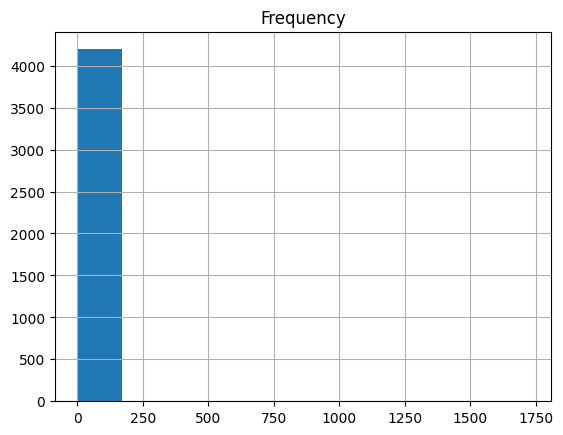

In [36]:
f_series.hist()

In [37]:
# TODO_04: Remove outliers again for the plot clearer

cut_95 = f_series.Frequency.quantile(0.95)
outliers = f_series[f_series.Frequency > cut_95].shape
print('Above p95 of {}: {} obs.'.format(cut_95, outliers))

Above p95 of 12.0: (203, 1) obs.


array([[<Axes: title={'center': 'Frequency'}>]], dtype=object)

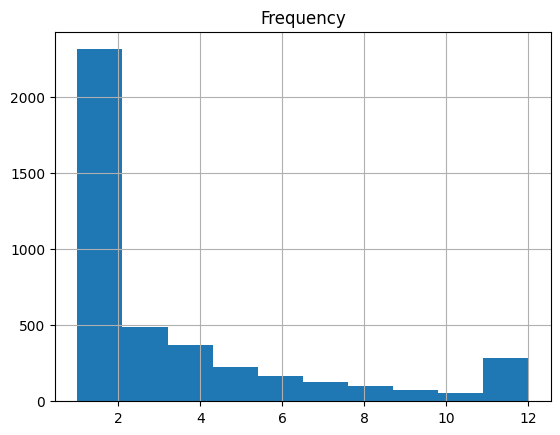

In [38]:
f_series[f_series.Frequency > cut_95] = cut_95 ## Replace the one > p95, by 95 value
f_series.hist()

### Monetary

`TODO_05`: Calculate Monetary

In [39]:
## We can either choose to sum or average the value of orders (Try the sum this time)
m_series = df1.groupby("CustomerID").agg({"TotalAmount":"sum"}).rename(columns={"TotalAmount":"Monetary"})
m_series.head()

,Monetary
CustomerID,
12347.0,3398.48
12348.0,210.20
12349.0,1303.75
12350.0,334.40
12352.0,1505.74


array([[<Axes: title={'center': 'Monetary'}>]], dtype=object)

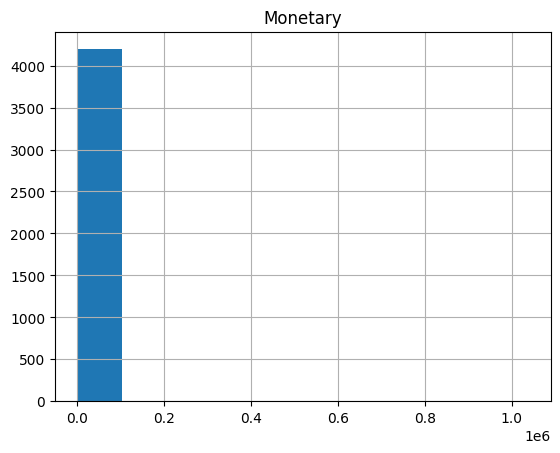

In [40]:
m_series.hist()

In [41]:
cut_95 = m_series.Monetary.quantile(0.95)
outliers = m_series[m_series.Monetary > cut_95].shape
print('Above p95 of {}: {} obs.'.format(cut_95, outliers))

Above p95 of 3702.277999999998: (210, 1) obs.


array([[<Axes: title={'center': 'Monetary'}>]], dtype=object)

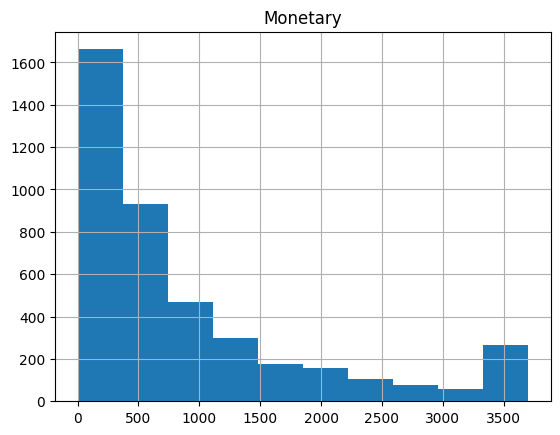

In [42]:
m_series[m_series.Monetary > cut_95] = cut_95 ## Replace the one > p95, by 95 value
m_series.hist()

### RFM Score

1. Concat `Recency`, `Frequency`, `Monetary`
2. Bin each element to 5 bins (equivalent to 5-level scale) -> `R_Score`, `F_Score`, `M_Score`
3. Combine `R_Score`, `F_Score`, `M_Score` into `RFM_SCORE`

> Notice that: `RFM_SCORE` and element scores are categorical.

In [43]:
rfm = pd.concat([r_series, f_series, m_series], axis=1)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,7,3398.48
12348.0,74,4,210.20
12349.0,18,1,1303.75
12350.0,309,1,334.40
12352.0,35,7,1505.74


In [44]:
## Bin the R, F, M into 5 bins by percentiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1]) ## score is reverse, as smaller Recency (days) is better
rfm['F_Score'] = pd.cut(rfm['Frequency'], 5, labels = [1, 2, 3, 4, 5], duplicates='drop') ## bin edges not unique, due to the skewed distribution
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5],duplicates='drop')
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12347.0,1,7,3398.48,5,3,5
12348.0,74,4,210.20,2,2,2
12349.0,18,1,1303.75,4,1,4
12350.0,309,1,334.40,1,1,2
12352.0,35,7,1505.74,3,3,5


In [45]:
## Generate the RFM Scores
# RFM Scores: Category
rfm["RFM_SCORE"] = (rfm['R_Score'].astype(str) +
                     rfm['F_Score'].astype(str) +
                     rfm['M_Score'].astype(str))

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_SCORE
CustomerID,,,,,,,
12347.0,1,7,3398.48,5,3,5,535
12348.0,74,4,210.20,2,2,2,222
12349.0,18,1,1303.75,4,1,4,414
12350.0,309,1,334.40,1,1,2,112
12352.0,35,7,1505.74,3,3,5,335


## 4/ RFM Analysis

### Distribution by RFM Score

1. First, we check the distribution of Value (`Monetary`) by all `RFM_SCORE` we have by boxplot
	- Have up to 85 possible values of `RFM_SCORE` combinations of R, F, M
	- This number of categories makes it not visible to obtain the insights -> Strategies to reduce the groups

> Discussion: Why 85, but not 5 x 5 x 5 = 125?

<Axes: xlabel='RFM_SCORE', ylabel='Monetary'>

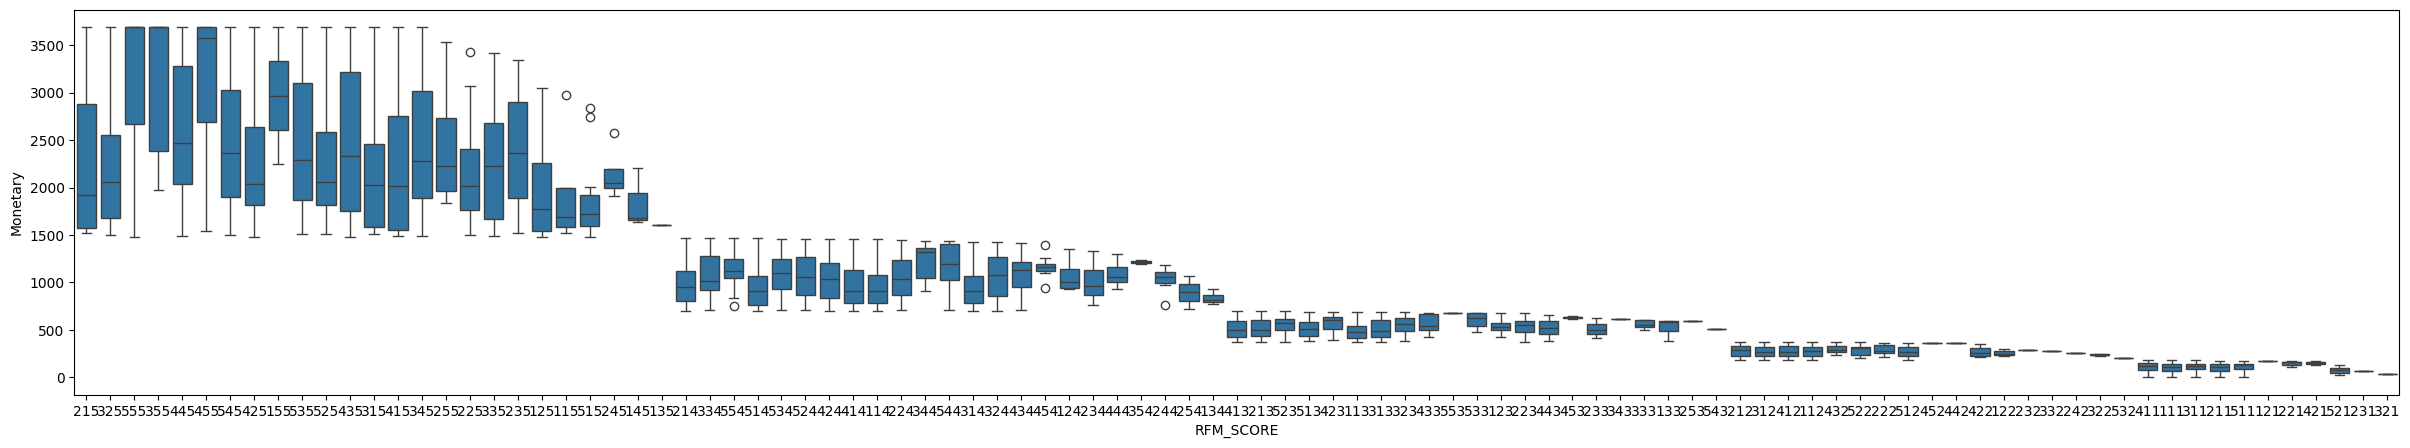

In [ ]:
plt.figure(figsize=(30, 5))
sns.boxplot(x='RFM_SCORE', y='Monetary', data=rfm.sort_values(by='Monetary',ascending=False))

In [46]:
len(rfm.RFM_SCORE.unique())

97

In [47]:
ls = []
for r in [1, 2, 3, 4, 5]:
  for f in [1, 2, 3, 4, 5]:
    for m in [1, 2, 3, 4, 5]:
      out = str(r) + str(f) + str(m)
      ls.append(out)

In [48]:
len(ls)

125

In [ ]:
# for e in ls:
#   if e not in rfm.RFM_SCORE.unique():
#     print(e)

# Or better way (list comprehensive): [e for e in ls if e not in rfm.RFM_SCORE.unique()]

### Distribution by RFM-based Segments

In [49]:
## With all 3 elements, there are many segments to focus. Let's segment by R, F only (keep M for comparison)
seg_map = {
    r'[1-2][1-2]': 'Hibernating', ## Recency =< 2, Bad Frequency =< 2
    r'[1-2][3-4]': 'At Risk', ## Bad Recency =< 2, Mid Frequency from 3-4
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) ## Here we only consider R, F => M is the value to summary
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

<Axes: xlabel='Segment', ylabel='Monetary'>

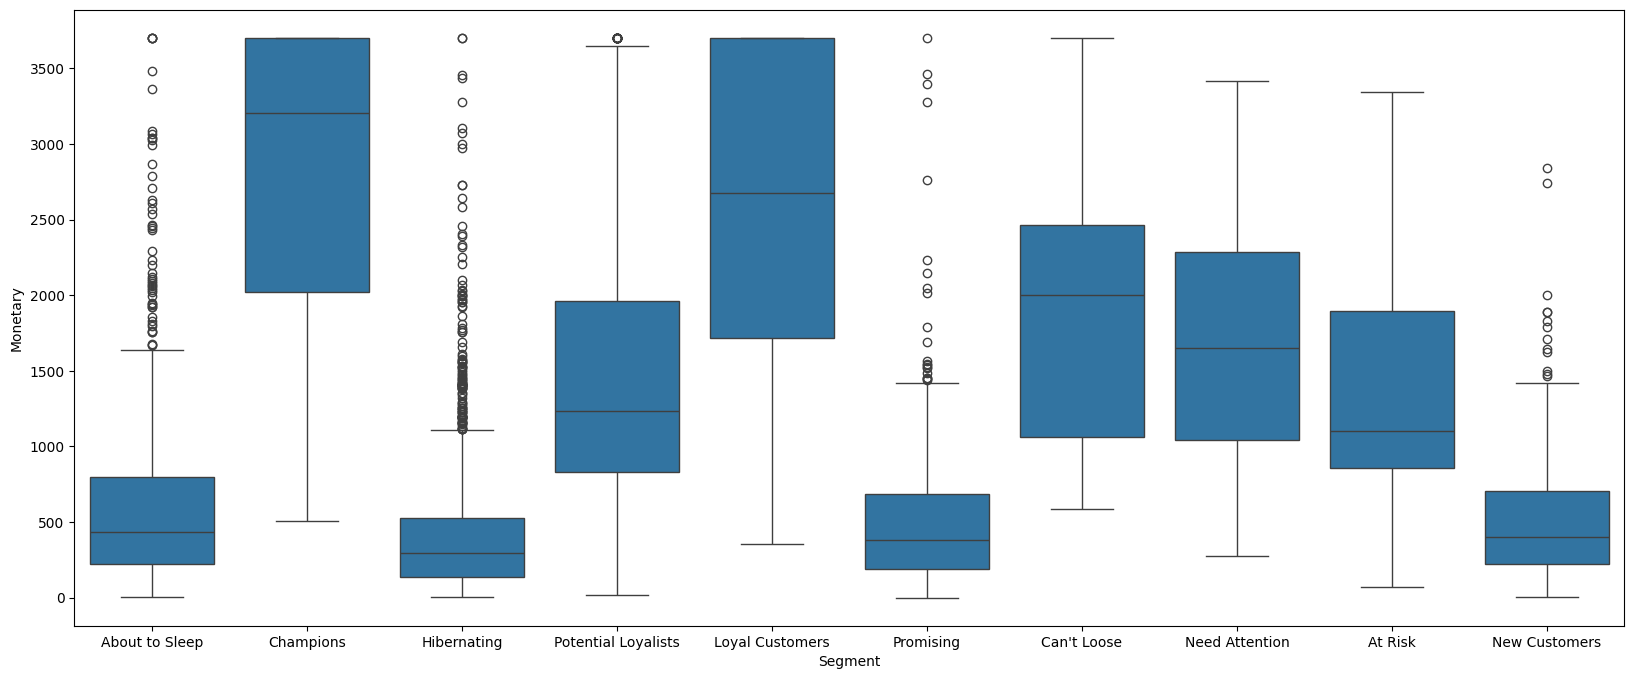

In [50]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Segment', y='Monetary', data=rfm.sort_values(by='Monetary',ascending=False))

### Deep-dive in each components

<Axes: xlabel='R_Score', ylabel='Frequency'>

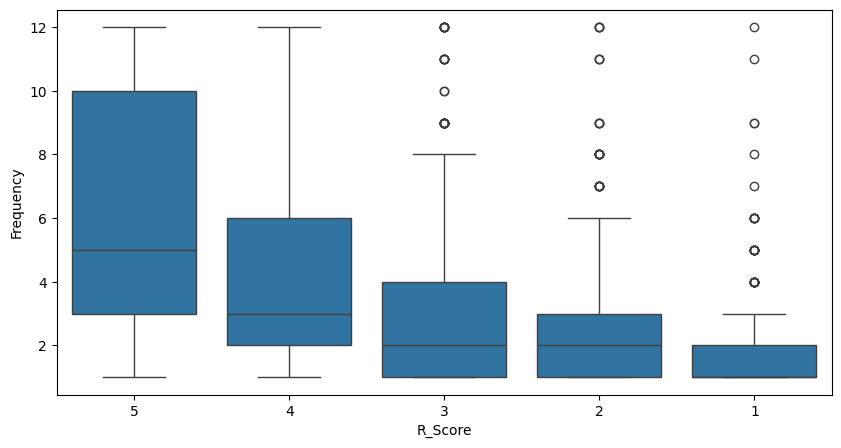

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='R_Score', y='Frequency', data=rfm)

<Axes: xlabel='F_Score', ylabel='Monetary'>

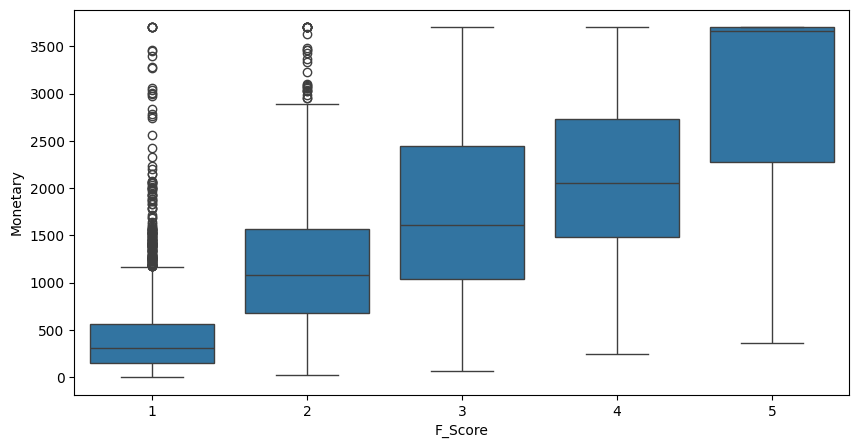

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='F_Score', y='Monetary', data=rfm)

### Aggregates by Segments

In [53]:
rfmStats = rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats.columns = rfmStats.columns.map('_'.join).str.strip('|')
rfmStats

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.088359,51.0,713,10.837502,2.176718,2.0,713,1.267425,641.350718,435.20,713,635.401080
At Risk,125.803922,105.0,51,55.926387,6.921569,6.0,51,1.092577,1354.296667,1105.07,51,790.328638
Can't Loose,145.777778,113.0,9,96.115527,11.555556,12.0,9,0.527046,2031.124222,2003.27,9,1141.272283
Champions,4.377926,3.0,299,3.649168,10.819398,12.0,299,1.539467,2844.766622,3207.26,299,943.161013
Hibernating,193.311841,183.0,1613,89.516395,1.693738,1.0,1613,1.012547,425.968189,296.10,1613,460.075099
Loyal Customers,28.076087,23.5,184,13.740955,10.070652,10.0,184,1.619690,2596.948761,2675.07,184,1000.048511
Need Attention,47.803279,49.0,61,9.639882,6.409836,6.0,61,0.495885,1733.394590,1654.25,61,819.483960
New Customers,6.003676,6.0,272,3.682509,2.040441,2.0,272,0.730352,528.488493,399.37,272,436.244473
Potential Loyalists,13.843284,13.0,536,9.606349,5.167910,5.0,536,1.104695,1482.712789,1234.98,536,888.270744


### Treemap

In [54]:
!pip install squarify

In [55]:
import squarify # pip install squarify

In [56]:
rfm.Segment.value_counts()

,count
Segment,
Hibernating,1613
About to Sleep,713
Potential Loyalists,536
Promising,460
Champions,299
New Customers,272
Loyal Customers,184
Need Attention,61
At Risk,51


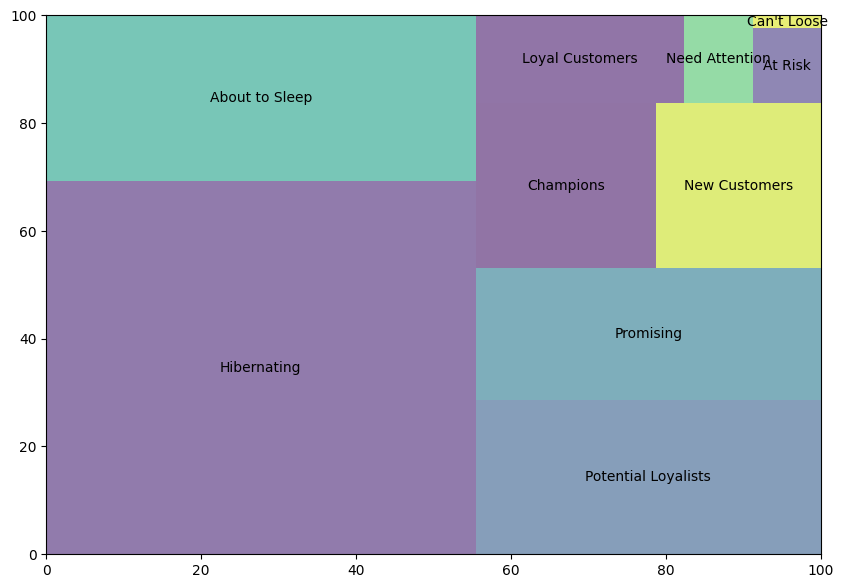

In [57]:
df_plot = rfm.Segment.value_counts()
plt.figure(figsize=(10, 7))
squarify.plot(df_plot, label=df_plot.index, alpha=0.6)
plt.show()